### 6(d). Take a binary image & perform Rigion Filling Algorithm using morphological operations.

#### Import Necessary Libraries.

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

#### Loading Original Image.

shape of the original image: (512, 512)


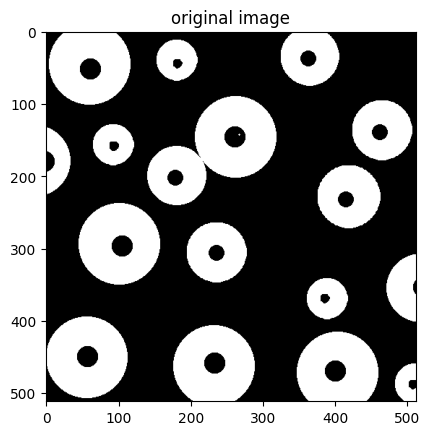

min pixel intensity: 0
max pixel intensity: 255


In [5]:
original_image = cv2.imread('./images/circle.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for region filling

In [6]:
def region_filling(image, seed_point, max_iter=10000):
    binary_image = image.copy()
    # Invert image to treat holes as foreground
    A = cv2.bitwise_not(binary_image)

    # Create initial seed image
    X = np.zeros_like(image, dtype=np.uint8)
    X[seed_point[1], seed_point[0]] = 255  # seed_point = (x, y)

    # Structuring element
    kernel = np.ones((3, 3), np.uint8)

    # Iterate until region stops growing or max iterations reached
    for _ in range(max_iter):
        X_new = cv2.dilate(X, kernel)
        X_new = cv2.bitwise_and(X_new, A)

        if np.array_equal(X, X_new):
            break
        X = X_new

    # Combine filled region with original image
    filled_image = cv2.bitwise_or(X, binary_image)
    return filled_image

### Region filling algorithm with morphological operation

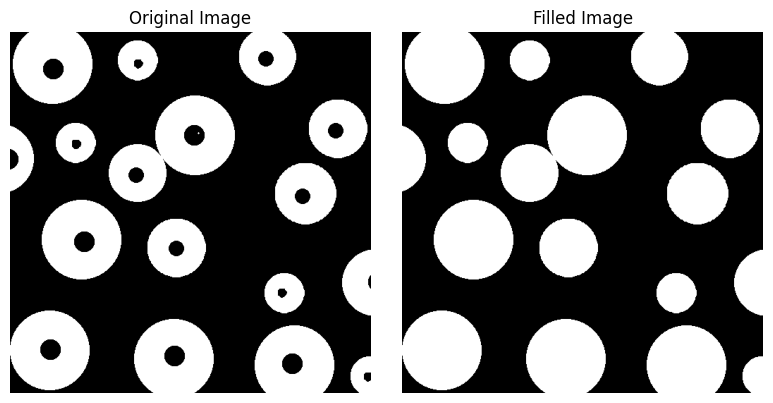

In [9]:
img = cv2.imread('./images/circle.tif', cv2.IMREAD_GRAYSCALE)
inverted_img = cv2.bitwise_not(img)

seed = (0, 0)
filled_image = img + cv2.bitwise_not(region_filling(img, seed))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filled_image, cmap='gray')
plt.title("Filled Image")
plt.axis('off')

plt.tight_layout()
plt.show()
